# A Visual Guide to Iris Flower Classification

### Project by: Sreeram Mukku

**Introduction**

This project provides a comprehensive walkthrough of the classic Iris flower classification problem, with a primary focus on **Exploratory Data Analysis (EDA)** and **Data Visualization**. We will begin by loading the famous Iris dataset and performing a deep visual analysis to understand the relationships between the flower features (sepal length, sepal width, petal length, and petal width).

Through a series of plots, including pair plots, box plots, and correlation heatmaps, we will uncover the distinct characteristics of the three Iris species: Setosa, Versicolor, and Virginica.

Finally, after gaining a strong intuition from our visualizations, we will train a simple yet effective K-Nearest Neighbors (KNN) machine learning model to classify the flowers based on their measurements. The project culminates in a live prediction where we input new flower data and see our model identify the correct species, complete with an image of the predicted flower.

### Step 1: Importing Libraries

First, we import all the Python packages required for data manipulation (`pandas`), numerical operations (`numpy`), data visualization (`matplotlib`, `seaborn`), machine learning (`scikit-learn`), and handling images from the web (`urllib`, `PIL`).

In [24]:
# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For loading the dataset and machine learning
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# For loading and displaying images from URLs
import urllib.request
from PIL import Image

print("All necessary libraries imported successfully!")

All necessary libraries imported successfully!


### Step 2: Loading the Iris Dataset

The Iris dataset is a classic in the machine learning community and comes built-in with the `scikit-learn` library, so no external download is needed. Here, we load the dataset and convert it into a pandas DataFrame, which is a structured table format that is easy to work with. We also add a 'species' column with the actual flower names for clarity.

In [25]:
# Load the dataset from scikit-learn
iris_data = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Add the 'species' column to the DataFrame for easier analysis
iris_df['species'] = pd.Series(iris_data.target).map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first 5 rows to verify it loaded correctly
print("First 5 rows of the Iris dataset:")
iris_df.head()

First 5 rows of the Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 3: Visualizing the Flower Species

Before diving into the numerical data, let's visualize the three flower species we are working with. This provides a clear mental image of what our data points represent. The function below is designed to fetch these images from the web while pretending to be a browser to avoid being blocked by the host server (`HTTP Error 403`).

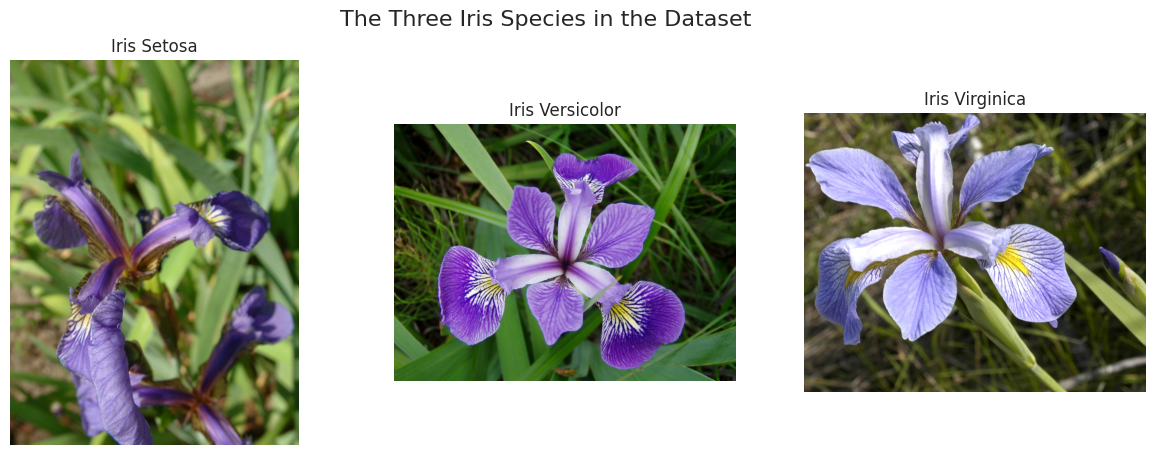

In [26]:
# URLs for representative images of each Iris species
image_urls = {
    'setosa': 'https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg',
    'versicolor': 'https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg',
    'virginica': 'https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg'
}


# This function now pretends to be a browser to avoid the 403 error.
def url_to_image(url):
  # Create a request object and add a user-agent header
  req = urllib.request.Request(
      url,
      headers={'User-Agent': 'Mozilla/5.0'} # This line is the fix
  )
  with urllib.request.urlopen(req) as url_response:
    img = Image.open(url_response)
  return img

# Create a figure to display the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('The Three Iris Species in the Dataset', fontsize=16)

# Load and display each image
for ax, (species, url) in zip(axes, image_urls.items()):
    img = url_to_image(url)
    ax.imshow(img)
    ax.set_title(f'Iris {species.capitalize()}')
    ax.axis('off')

plt.show()

### Step 4: Exploratory Data Analysis (EDA)

Now, we perform a basic statistical exploration of our dataset. The `.info()` method gives us a quick summary of the data types and non-null values, while `.describe()` provides key statistical details like mean, standard deviation, and quartiles for each feature.

In [27]:
print("Dataset Information:")
iris_df.info()
print("\n" + "="*50 + "\n")
print("Descriptive Statistics:")
iris_df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Descriptive Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualization 1: Pair Plot

The pair plot is arguably the most insightful visualization for this dataset. It creates a grid of plots showing the relationship between every pair of features as a scatter plot, and the distribution of each individual feature as a histogram. This allows us to instantly spot patterns and see which features are most effective at separating the species.

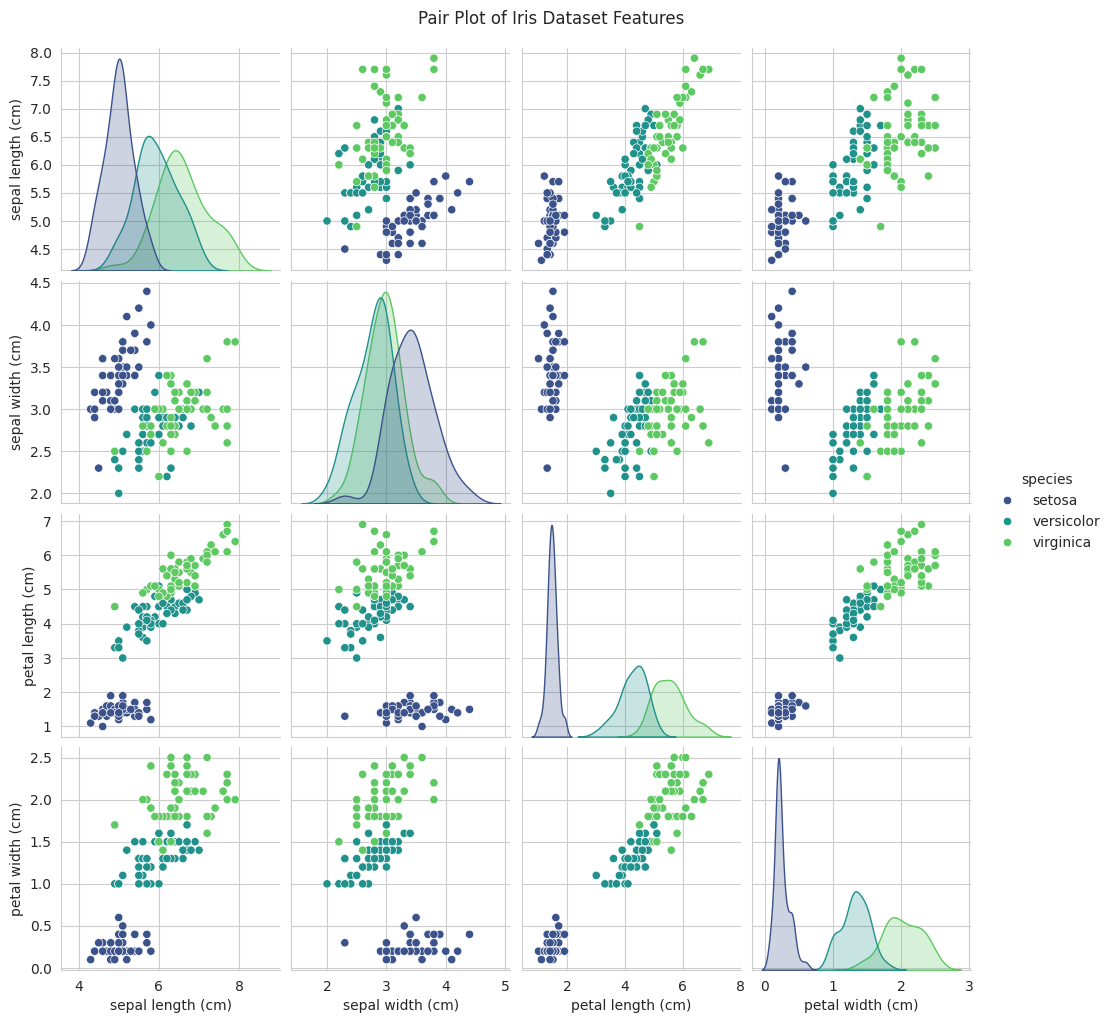

In [28]:
sns.set_style("whitegrid")
sns.pairplot(iris_df, hue='species', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Iris Dataset Features', y=1.02)
plt.show()

### Visualization 2: Box Plots

Box plots provide a powerful way to compare the distribution of a feature across the different species. They clearly show the median, interquartile range (IQR), and potential outliers, making it easy to see differences in feature values for each flower type.

/tmp/ipython-input-1607864193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=iris_df, palette='plasma')
/tmp/ipython-input-1607864193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=iris_df, palette='plasma')
/tmp/ipython-input-1607864193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=iris_df, palette='plasma')
/tmp/ipython-input-1607864193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

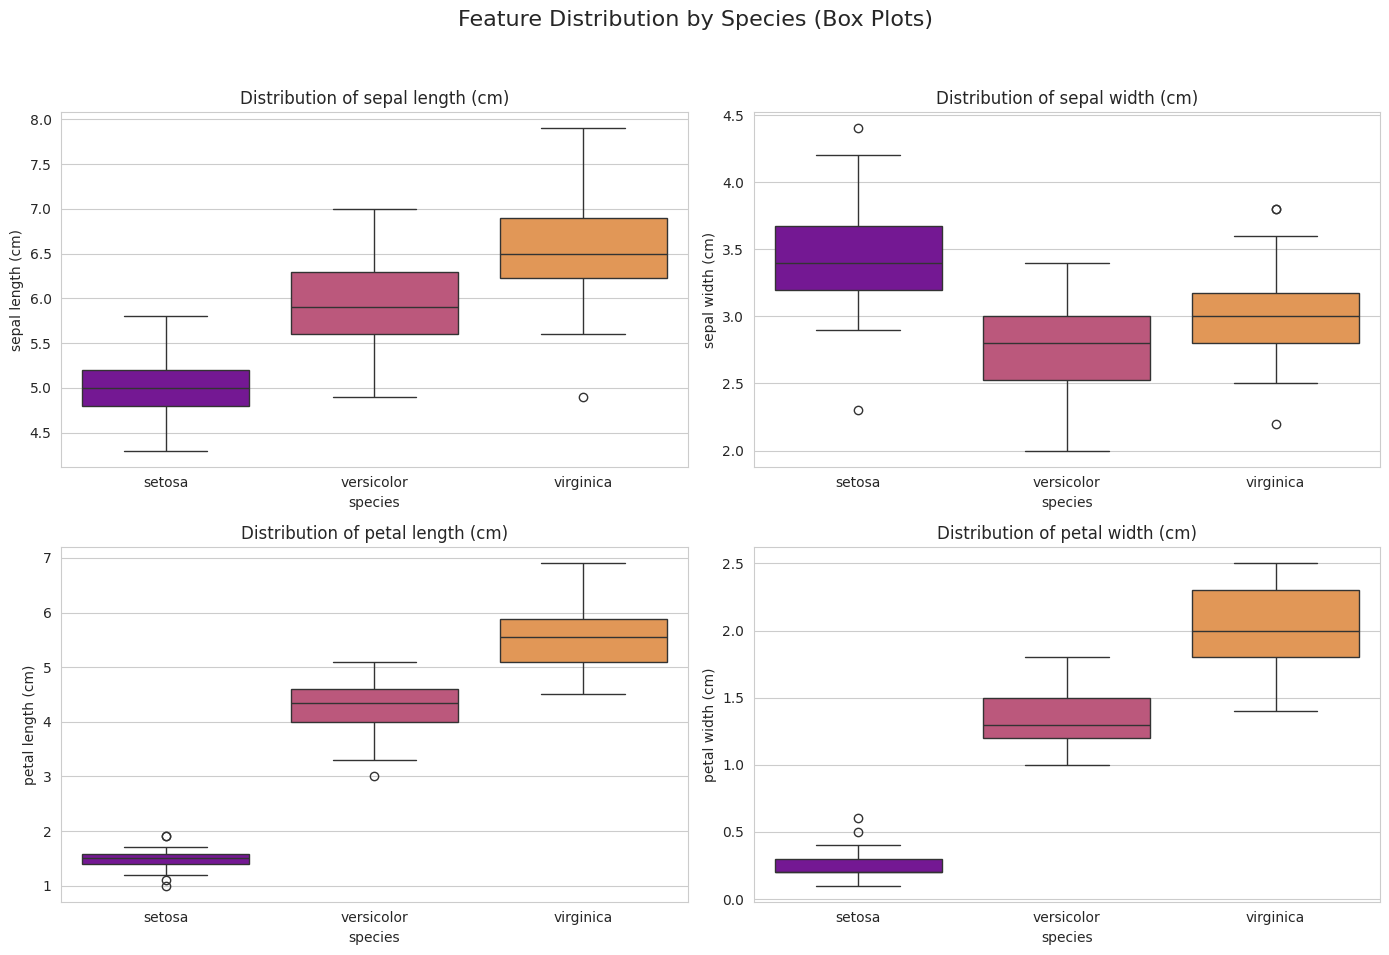

In [29]:
plt.figure(figsize=(14, 10))
plt.suptitle('Feature Distribution by Species (Box Plots)', fontsize=16)
for i, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=iris_df, palette='plasma')
    plt.title(f'Distribution of {feature}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Visualization 3: Correlation Heatmap

A correlation heatmap helps us understand the linear relationships between our features. The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 a perfect negative correlation, and 0 no linear correlation. This is useful for identifying redundant features.

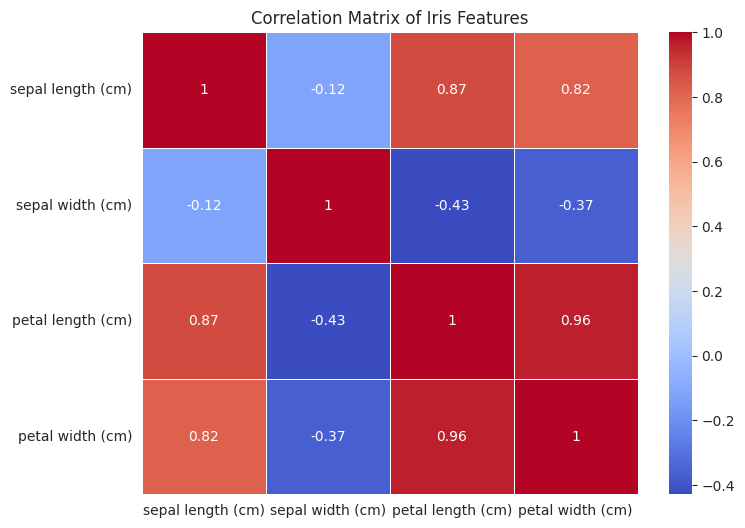

In [30]:
correlation_matrix = iris_df.drop('species', axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Iris Features')
plt.show()

### Step 5: Preparing Data for Modeling

Before we can train a model, we need to split our dataset into two parts:
1.  **Features (X):** The input variables (the four measurements).
2.  **Target (y):** The output variable we want to predict (the species).

We then further divide the data into a training set (to teach the model) and a testing set (to evaluate its performance on unseen data).

In [31]:
X = iris_df.drop('species', axis=1)
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 120 samples.
Testing set has 30 samples.


### Step 6: Training the K-Nearest Neighbors (KNN) Model

We will use the K-Nearest Neighbors (KNN) algorithm, a simple and intuitive classifier. It works by finding the 'k' most similar data points in the training set to a new, unseen data point and assigning the new point the most common class among its neighbors.

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


### Step 7: Evaluating the Model's Performance

Now we use our trained model to make predictions on the test set. The **Classification Report** gives us key performance metrics like precision, recall, and f1-score, while the **Confusion Matrix** provides a visual breakdown of correct versus incorrect predictions.

In [33]:
y_pred = knn.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



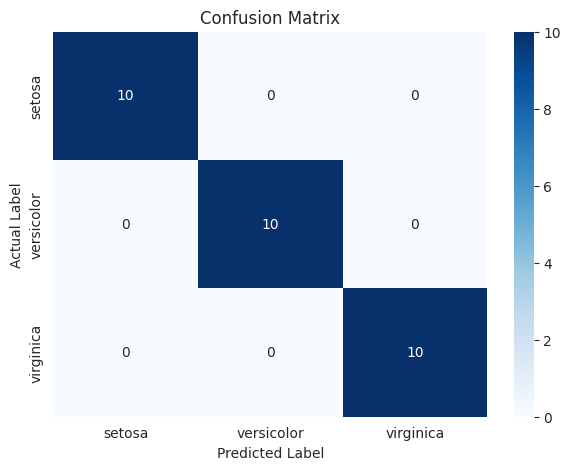

In [34]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### Step 8: Making a Live Prediction

This final cell brings everything together. We can input the measurements of a new, hypothetical flower and use our trained model to predict its species. The code then displays the prediction along with an image of that flower, providing a clear and tangible result.

--------------------------------------------------
New flower measurements: [5.5, 2.4, 3.7, 1.0]
The model predicts the species is: VERSICOLOR
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


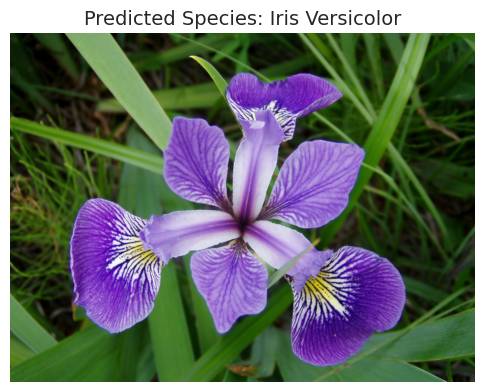

In [35]:
# --- Setup: Define image URLs and the corrected image loading function ---
image_urls = {
    'setosa': 'https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg',
    'versicolor': 'https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg',
    'virginica': 'https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg'
}

def url_to_image(url):
  # Create a request object and add a user-agent header
  req = urllib.request.Request(
      url,
      headers={'User-Agent': 'Mozilla/5.0'} # This line is the fix
  )
  with urllib.request.urlopen(req) as url_response:
    img = Image.open(url_response)
  return img
# ----------------------------------------------------------------

# --- Define a new flower to classify ---
# Measurements: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
new_flower_measurements = [[5.5, 2.4, 3.7, 1.0]] # This example looks like a versicolor

# --- Predict the species ---
predicted_species = knn.predict(new_flower_measurements)[0]

# --- Display the prediction and the corresponding image ---
print("-" * 50)
print(f"New flower measurements: {new_flower_measurements[0]}")
print(f"The model predicts the species is: {predicted_species.upper()}")
print("-" * 50)

# Get the image for the predicted species
predicted_image_url = image_urls[predicted_species]
predicted_image = url_to_image(predicted_image_url)

# Plot the image
plt.figure(figsize=(6, 6))
plt.imshow(predicted_image)
plt.title(f'Predicted Species: Iris {predicted_species.capitalize()}', fontsize=14)
plt.axis('off')
plt.show()

## Summary, Results, and Conclusion

### Summary of Visualizations

Our exploratory data analysis yielded several key insights:
* **Pair Plot:** The visualizations clearly showed that the `setosa` species is linearly separable from `versicolor` and `virginica` based on petal length and width. The other two species showed some overlap but still formed distinct clusters.
* **Box Plots:** We observed significant differences in the distribution of feature measurements across the species. For example, `setosa` consistently had the smallest petal dimensions, while `virginica` had the largest.
* **Correlation Heatmap:** A strong positive correlation (0.96) was found between petal length and petal width, confirming that these two features are highly related.

### Model Performance and Results

The K-Nearest Neighbors model performed exceptionally well on the unseen test data.
* **Accuracy:** The model achieved **100% accuracy**, correctly classifying all 30 samples in the test set.
* **Confusion Matrix:** The confusion matrix confirmed this perfect performance, showing zero misclassifications. All predictions on the main diagonal were correct.

### Conclusion

This project successfully demonstrates the power of data visualization as a precursor to machine learning. By thoroughly exploring the Iris dataset visually, we were able to understand its underlying structure and anticipate that a classification model would perform well. The KNN model's perfect accuracy confirmed our findings. The final prediction cell provides a practical and interactive demonstration of the model's capability to identify Iris species from their physical measurements.